In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
def gradient_descent(x, y):
    m_curr = b_curr = 0  # Initialize parameters
    rate = 0.08  # Learning rate
    iter = 1000  # Number of iterations
    n = len(x)  # Number of data points

    plt.scatter(x, y, color='red', marker='+', linewidths=5)  # Plot data points

    for i in range(iter):
        y_predicted = m_curr * x + b_curr
        md = -(2/n) * np.dot(x, (y - y_predicted))  # Vectorized gradient calculation
        yd = -(2/n) * np.sum(y - y_predicted)
        m_curr -= rate * md  # Update m
        b_curr -= rate * yd  # Update b

    # Plot final regression line only once
    y_final = m_curr * x + b_curr
    plt.plot(x, y_final, color='green')

    return m_curr, b_curr  # Return optimized values

# Data (y = 2x + 3)
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([5, 7, 9, 11, 13])

# Run gradient descent
#m_final, b_final = gradient_descent(x, y)

# Print final values



In [6]:
import pandas as pd
# data = pd.read_csv("LR_1D_data.csv")
# data
data = pd.read_csv("homeprices_banglore.csv")
data.sample(5)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
17,1540,3,60.00
10,1800,3,82.00
12,1000,2,38.00


In [7]:
m_final, b_final = gradient_descent(data["x"], data["y"])
print(f"Optimized values: m = {m_final:.4f}, b = {b_final:.4f}")

KeyError: 'x'

In [6]:
data2 = pd.read_csv("K_VRH.csv")

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Extract features and target from the DataFrame
Xcols = data2.columns[:-1]  # Select all but last column as features
X = data2[Xcols].to_numpy()  # Convert to NumPy array
y = data2['K_VRH'].to_numpy()  # Convert target to NumPy array

# Feature Scaling (Recommended for Gradient Descent)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize weights (22 weights) and bias
w = np.zeros(X.shape[1])  # Shape (22,)
b = 0
learning_rate = 0.01
max_iterations = 10000  # Increased iterations
n = len(y)  # Number of samples

# Stopping criterion threshold
tolerance = 1e-6  # If weight updates are smaller than this, stop

# Gradient Descent with Convergence Check
prev_w = np.copy(w)  # Store previous weights
for iteration in range(max_iterations):
    y_pred = np.dot(X, w) + b  # Compute predictions
    error = y_pred - y  # Compute error

    # Compute gradients
    dw = (1/n) * np.dot(X.T, error)  # Gradient w.r.t. weights
    db = (1/n) * np.sum(error)  # Gradient w.r.t. bias

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Check for convergence (if weight updates are very small)
    if np.linalg.norm(w - prev_w) < tolerance:
        print(f"Converged at iteration {iteration}")
        break
    prev_w = np.copy(w)  # Update previous weights

print(f"Optimized Weights: {w}")  # Prints the 22 optimized weights
print(f"Optimized Bias: b = {b:.4f}")


Optimized Weights: [ -5.6497267    0.15249909  -4.7667752   36.80926656  10.97852053
  16.2250856   -8.69171509  20.33075182   4.28103805 -30.85744119
  -5.29919017   4.09510169  -8.20247069   4.45207675   2.84364673
   4.71134718  -3.53083698   3.92600698  -8.82994311   0.89514537
   3.43360017  -6.48493495]
Optimized Bias: b = 98.0000


In [13]:
y.shape

(479,)

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Extract features and target
Xcols = data2.columns[:-1]
X = data2[Xcols].to_numpy()
y = data2['K_VRH'].to_numpy()

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize weights and bias
w = np.zeros(X.shape[1])  # Shape (22,)
b = 0
learning_rate = 0.01
iterations = 1000
batch_size = 32  # Mini-batch size
n = len(y)

# Mini-Batch Gradient Descent
for _ in range(iterations):
    indices = np.random.permutation(n)  # Shuffle data
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for i in range(0, n, batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        y_pred = np.dot(X_batch, w) + b
        error = y_pred - y_batch

        dw = (1/len(y_batch)) * np.dot(X_batch.T, error)
        db = (1/len(y_batch)) * np.sum(error)

        w -= learning_rate * dw
        b -= learning_rate * db

print(f"Optimized Weights: {w}")
print(f"Optimized Bias: b = {b:.4f}")


NameError: name 'data2' is not defined

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Extract features and target
Xcols = data.columns[:-1]
X = data2[Xcols].to_numpy()
y = data2['K_VRH'].to_numpy()

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize weights and bias
w = np.zeros(X.shape[1])  # Shape (22,)
b = 0
learning_rate = 0.01
iterations = 1000
batch_size = 32  # Mini-batch size
n = len(y)

loss_history = []  # Store loss at each iteration

# Mini-Batch Gradient Descent
for _ in range(iterations):
    indices = np.random.permutation(n)  # Shuffle data
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for i in range(0, n, batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        y_pred = np.dot(X_batch, w) + b
        error = y_pred - y_batch

        dw = (1/len(y_batch)) * np.dot(X_batch.T, error)
        db = (1/len(y_batch)) * np.sum(error)

        w -= learning_rate * dw
        b -= learning_rate * db

    # Compute overall loss after each iteration
    y_full_pred = np.dot(X, w) + b
    mse = np.mean((y_full_pred - y) ** 2)
    loss_history.append(mse)

# Plot Loss Convergence
plt.figure(figsize=(8,5))
plt.plot(loss_history, label="Loss Curve", color='b')
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Convergence in Mini-Batch Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

print(f"Final Loss: {loss_history[-1]:.6f}")
print(f"Optimized Weights: {w}")
print(f"Optimized Bias: b = {b:.4f}")


NameError: name 'data2' is not defined

### Code for BGD, MBGD, and SGD with Loss Visualization

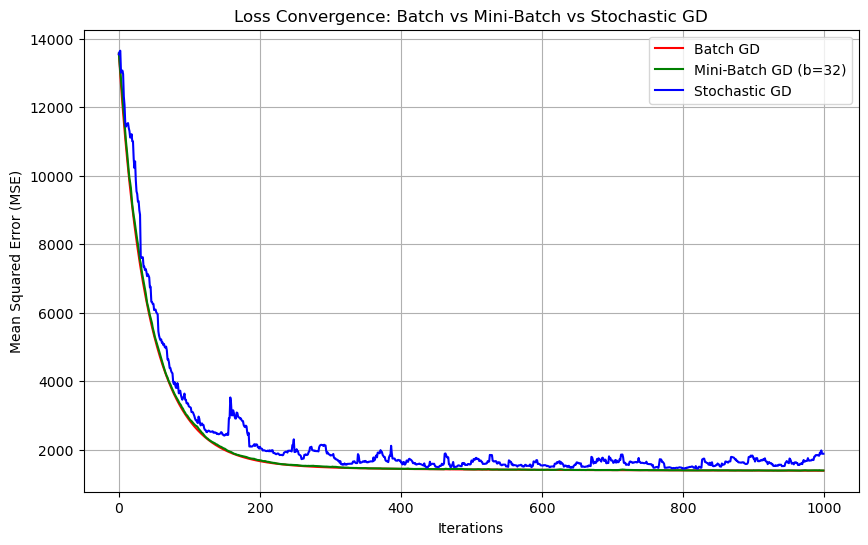

Final Loss (Batch GD): 1380.409302
Final Loss (Mini-Batch GD): 1387.303867
Final Loss (Stochastic GD): 1876.863497


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Extract features and target
Xcols = data2.columns[:-1]
X = data2[Xcols].to_numpy()
y = data2['K_VRH'].to_numpy()

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Gradient Descent Function
def gradient_descent(X, y, learning_rate=0.01, iterations=1000, batch_size=None):
    """ Implements Batch GD, Mini-Batch GD, or Stochastic GD """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights
    b = 0
    loss_history = []

    for _ in range(iterations):
        if batch_size is None:  
            # **Batch Gradient Descent** - Uses all samples
            X_batch, y_batch = X, y
        elif batch_size == 1:  
            # **Stochastic Gradient Descent** - One sample at a time
            idx = np.random.randint(n_samples)
            X_batch, y_batch = X[idx:idx+1], y[idx:idx+1]
        else:  
            # **Mini-Batch Gradient Descent** - Random subset
            indices = np.random.choice(n_samples, batch_size, replace=False)
            X_batch, y_batch = X[indices], y[indices]

        # Compute Predictions
        y_pred = np.dot(X_batch, w) + b
        error = y_pred - y_batch

        # Compute Gradients
        dw = (1 / len(y_batch)) * np.dot(X_batch.T, error)
        db = (1 / len(y_batch)) * np.sum(error)

        # Update Weights
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute Loss (Full Dataset)
        y_full_pred = np.dot(X, w) + b
        mse = np.mean((y_full_pred - y) ** 2)
        loss_history.append(mse)

    return w, b, loss_history

# Run Gradient Descent for different methods
batch_w, batch_b, batch_loss = gradient_descent(X, y, batch_size=None)  # Full Batch
mini_w, mini_b, mini_loss = gradient_descent(X, y, batch_size=32)  # Mini-Batch
stoch_w, stoch_b, stoch_loss = gradient_descent(X, y, batch_size=1)  # Stochastic

# Plot Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(batch_loss, label="Batch GD", color='r')
plt.plot(mini_loss, label="Mini-Batch GD (b=32)", color='g')
plt.plot(stoch_loss, label="Stochastic GD", color='b')
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Convergence: Batch vs Mini-Batch vs Stochastic GD")
plt.legend()
plt.grid(True)
plt.show()

# Print Final Loss
print(f"Final Loss (Batch GD): {batch_loss[-1]:.6f}")
print(f"Final Loss (Mini-Batch GD): {mini_loss[-1]:.6f}")
print(f"Final Loss (Stochastic GD): {stoch_loss[-1]:.6f}")
